In [3]:
using Images, ImageView, ImageFiltering

misty = load("misty.jpg") 
#= You can find misty.jpg in the resources folder, 
make sure to put it in the same directory you run the code =#


In [4]:
# if you want to run this outside Jupyter, you can do this:
# imshow(misty)

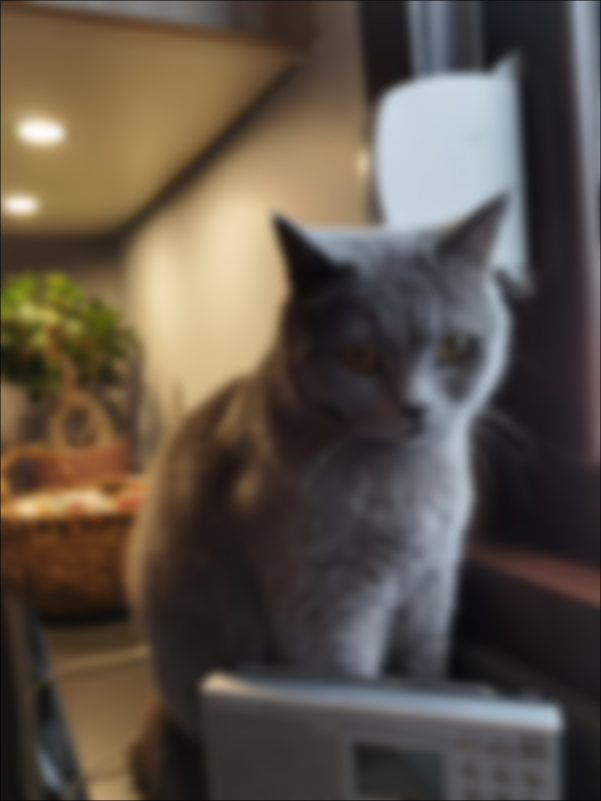

In [32]:
# let's blur misty
kernel = reflect(Kernel.gaussian(10)) #calling reflect will convert correlation to a convolution
#a kernel is a 2d matrix where the sum of the values are 1
blurred_misty = imfilter(misty, kernel) 


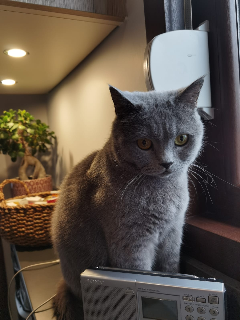

5×5 OffsetArray(::Matrix{Float64}, -2:2, -2:2) with eltype Float64 with indices -2:2×-2:2:
 9.25455e-5  0.00197619  0.00548259  0.00197619  9.25455e-5
 0.00197619  0.0421989   0.117074    0.0421989   0.00197619
 0.00548259  0.117074    0.3248      0.117074    0.00548259
 0.00197619  0.0421989   0.117074    0.0421989   0.00197619
 9.25455e-5  0.00197619  0.00548259  0.00197619  9.25455e-5

In [31]:
# what this does: it takes the values from the kernel and multiplies them by corresponding RGB values
# to modify the pixel. it takes the sum of the multiplied pixel values to replace the center pixel value with it
# suppose we have an image:
display(misty[1:5:end, 1:5:end]) #this is a 5x reduced misty
# and a kernel like this:
display(Kernel.gaussian(1))

In [27]:
# what happens is that for every pixel p, it multiplies the RGB values of the center pixel by the center value from the kernel,
# multiplies the pixel one to the left by the value one left to the center in the kernel and so on
# essentially think of it as a grid marching on the image.
# different kernels give out different results


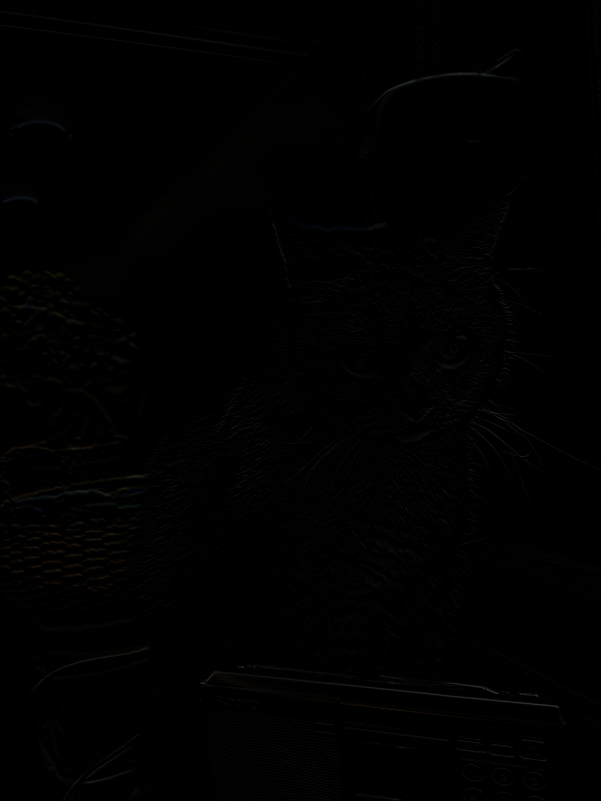

In [39]:
new_kernel = Kernel.sobel()[1]
edge_detected_misty = imfilter(misty, new_kernel)

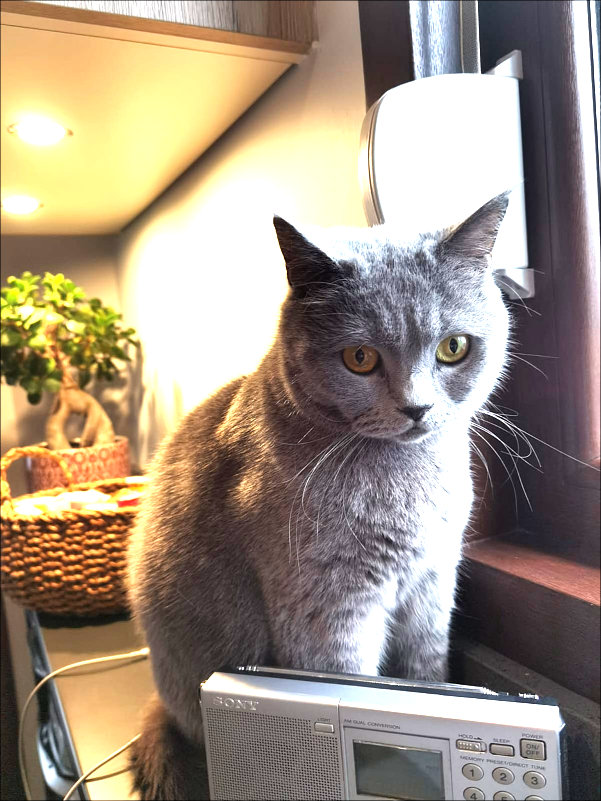

In [41]:
# not much useful. edge detecting kernels work best when the image is sharpened beforehand. let's sharpen up misty then

# since ImageFiltering does not have a sharpening kernel, let's create our own.

sharp_kernel = centered([
        -0.5 -1 -0.5
        -0.5 7 -0.5
        -0.5 -1 -0.5
])

sharp_misty = imfilter(misty, sharp_kernel)

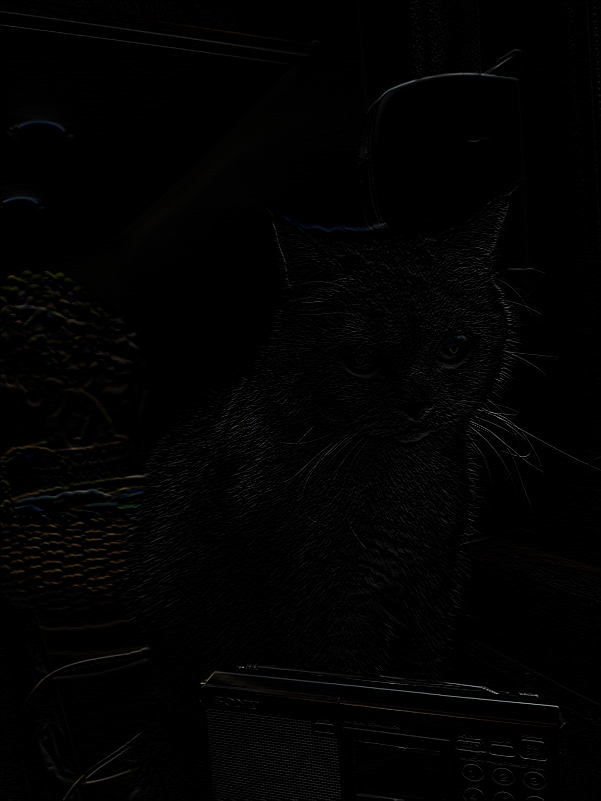

In [42]:
# looks better now, overexposed but noticeably sharper.
# let's edge detect once again then
edge_detected_misty = imfilter(sharp_misty, new_kernel)

In [ ]:
# much better. we can even further sharpen the image to get a better edge detection but that may result in artifacts. 
# this should work fine for now. check other notebooks for more examples and cool stuff. this is just the beginning.